# DecisionTree regressor
https://stackoverflow.com/questions/46139186/interpreting-the-decisiontreeregressor-score https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [18]:
df = pd.read_csv("(0814)dog_info_final(2).csv",encoding="euc-kr")

df['breed'].unique()

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.5, 2.6, 2.7,
       2.8, 2.9, 3.1, 3.2, 3.3, 3.5, 3.7, 3.9, 4. , 4.1, 4.2, 4.3, 4.5,
       4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.4, 5.6, 5.7, 6.1, 6.3, 6.5, 6.7,
       6.8, 7.1, 7.3, 7.4, 7.5, 8.5])

In [2]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
df = pd.read_csv("(0814)dog_info_final(5_top16_균등).csv",encoding="euc-kr")

x_data = df.drop(['adoption_info'], axis=1).values # 독립변인들의 value값만 추출
y_data = df['adoption_info'].values # 종속변인 추출

#x_data = StandardScaler().fit_transform(x_data)
x_data=pd.DataFrame(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=30)

adoption_model=DecisionTreeRegressor(random_state=3)

adoption_model.fit(x_train,y_train)


val_predictions=adoption_model.predict(x_test)

print('mean_squared_error:')
print(mean_squared_error(y_test, val_predictions))

print(adoption_model.score(x_train, y_train)) 

print(adoption_model.score(x_test, y_test))

print("강아지의 입양율:")
print(x_data.head())
print("The predictions are")
print(adoption_model.predict(x_data.head(10)))

test_data = [0.2, 2, 1, 1, 0.1]
#test_data = StandardScaler().fit_transform(test_data)
print('입양될 확률:',adoption_model.predict([test_data])[0]*100)

#from sklearn.metrics import accuracy_score
#pred=adoption_model.predict(x_test)
#print("Accuracy using Logisitic Regression : ",accuracy_score(y_test,pred))

# 결론 : decisiontree regressor 를 이용했을 떄, MSE 결과 0.18가 나왔다.
# MSE가 낮을 수록 오차가 작다는 것을 의미하기 때문에, 해당 회귀분류는 타당성이 있다고 판단된다.
# 출력결과는 0과 1사이로 표현되는 회귀결과이다. 따라서, 이 결과를 0~1사이의 거리 비례로 환산하여 확률로 표현했다.
#변수 test_data에 breed, sex, weight, age, color 의 값을 순서대로 넣으면 해당 강아지의 입양률이 나온다.
# scaler는 decisiontree regressor에서 무의미 하다고 판단되었기에 사용하지 않았다. 
# ( decisiontree에서는 각 열간의 숫자 크기의 의미가 중요하지 않기 때문 => 실제로, scaler를 사용했을때도 결과는 유사했음)





mean_squared_error:
0.2952371047148949
0.35403283538536023
-0.19808544877304102
강아지의 입양율:
     0    1    2    3    4
0  0.1  2.0  4.0  4.0  1.4
1  0.2  2.0  1.0  1.0  0.1
2  0.2  1.0  1.0  1.0  0.1
3  0.2  1.0  1.0  1.0  0.1
4  0.2  2.0  5.0  3.0  1.0
The predictions are
[0.         0.55309735 0.51612903 0.51612903 0.33333333 0.
 0.         0.5        0.         0.5       ]
입양될 확률: 55.309734513274336


# SVM regressor
https://www.youtube.com/watch?v=EsT49L-0vso
https://m.blog.naver.com/PostView.nhn?blogId=ehdrndd&logNo=221335146108&referrerCode=0&searchKeyword=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%20%EC%8B%A4%EC%8A%B5

In [4]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
# #############################################################################
# Generate sample data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
#x = df.drop(['adoption_info'], axis=1).values # 독립변인들의 value값만 추출
#y = df['adoption_info'].values # 종속변인 추출

df = pd.read_csv("(0814)dog_info_final(5_top16_균등).csv",encoding="euc-kr")
dog_info = ['breed','sex','weight','age','color']

X = df[dog_info]
y =df['adoption_info']
#X = StandardScaler().fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# #############################################################################
# Fit regression model
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')



sv_regressor = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
sv_regressor.fit(X_train,y_train)


y_test_pred = sv_regressor.predict(X_test)
mse = mean_squared_error(y_test,y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)


print("Mean squared error=", round(mse,2))
print("Explained variance socre=", round(evs,2))

(3481, 5)
(1493, 5)
(3481,)
(1493,)
Mean squared error= 0.32
Explained variance socre= -0.21


In [5]:
test_data = [1,1,1,1,1]
print(sv_regressor.predict([test_data])[0])

1.0933909719676436


# 신경망


(1766, 2)
Epoch 1/7
1412/1412 [==============================] - 4s 3ms/step - loss: 0.5785 - accuracy: 0.7261 - val_loss: 0.5904 - val_accuracy: 0.7146
Epoch 2/7
1412/1412 [==============================] - 3s 2ms/step - loss: 0.5715 - accuracy: 0.7265 - val_loss: 0.5768 - val_accuracy: 0.7163
Epoch 3/7
1412/1412 [==============================] - 3s 2ms/step - loss: 0.5720 - accuracy: 0.7299 - val_loss: 0.5800 - val_accuracy: 0.7140
Epoch 4/7
1412/1412 [==============================] - 4s 2ms/step - loss: 0.5694 - accuracy: 0.7314 - val_loss: 0.5761 - val_accuracy: 0.7157
Epoch 5/7
1412/1412 [==============================] - 3s 2ms/step - loss: 0.5695 - accuracy: 0.7313 - val_loss: 0.5761 - val_accuracy: 0.7152
Epoch 6/7
1412/1412 [==============================] - 3s 2ms/step - loss: 0.5678 - accuracy: 0.7323 - val_loss: 0.5755 - val_accuracy: 0.7169
Epoch 7/7
56/56 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7174

 Accuracy: 0.7174


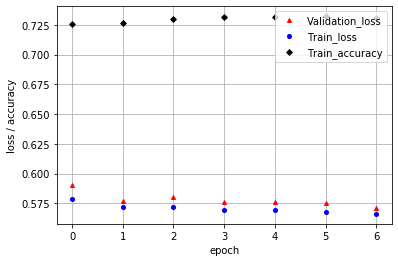

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               600       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 10,902
Trainable params: 10,902
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your

In [3]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils

column_names = ['breed','sex','weight','color','age','adoption']
dataset = pd.read_csv('(0814)dog_info_final(7).csv',names=column_names)

#scaler 적용
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler()
scaler4 = MaxAbsScaler()

dataset[['breed','sex','weight','color','age']] = scaler1.fit_transform(dataset[['breed','sex','weight','color','age']])
#sns.pairplot(dataset, hue='adoption')
#plt.show()

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

    ##y값의 활성화 함수 적용
data = dataset.values
X=data[:,0:5].astype(float)
Y_obj = data[:,5]

#머신러닝 시도

## Y차원 늘린후 0 or 1로 만들기 : one-hot-encoding
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)

#학습셋과 테스트셋의 구분
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X,Y_encoded,test_size=0.2,random_state=seed)
print(Y_valtest.shape)

#classification모델
## make model
model = Sequential()
model.add(Dense(100, input_dim=5, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, input_dim=5, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history =model.fit(X_train, Y_train, validation_data=(X_valtest,Y_valtest), epochs=7, batch_size=5)

print("\n Accuracy: %.4f" % (model.evaluate(X_valtest,Y_valtest)[1]))

model.save("model_jj.h5","w")

y_vloss=history.history['val_loss']
y_loss =history.history['loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,"^",c="red",markersize=4,label="Validation_loss")
plt.plot(x_len,y_loss,"o",c="blue",markersize=4,label="Train_loss")
plt.plot(x_len,y_acc,"D",c="black",markersize=4,label="Train_accuracy")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss / accuracy')
plt.show()

test_data = dataset.sample(2)
test_data=test_data.values
x_test = test_data[:,0:5]
y_test = test_data[:,5]

print(model.summary())
#predict 는 probability를 predict_class 는 label 을 제공한다.
pred_result1=model.predict(x_test)                 #regression결과값
pred_result2=model.predict_classes(x_test)         #classification결과값

print(pred_result1)
print(pred_result2)

In [14]:
pred_result1

array([[0.82641685, 0.17933959],
       [0.8088902 , 0.18968336]], dtype=float32)

# SVM 모델

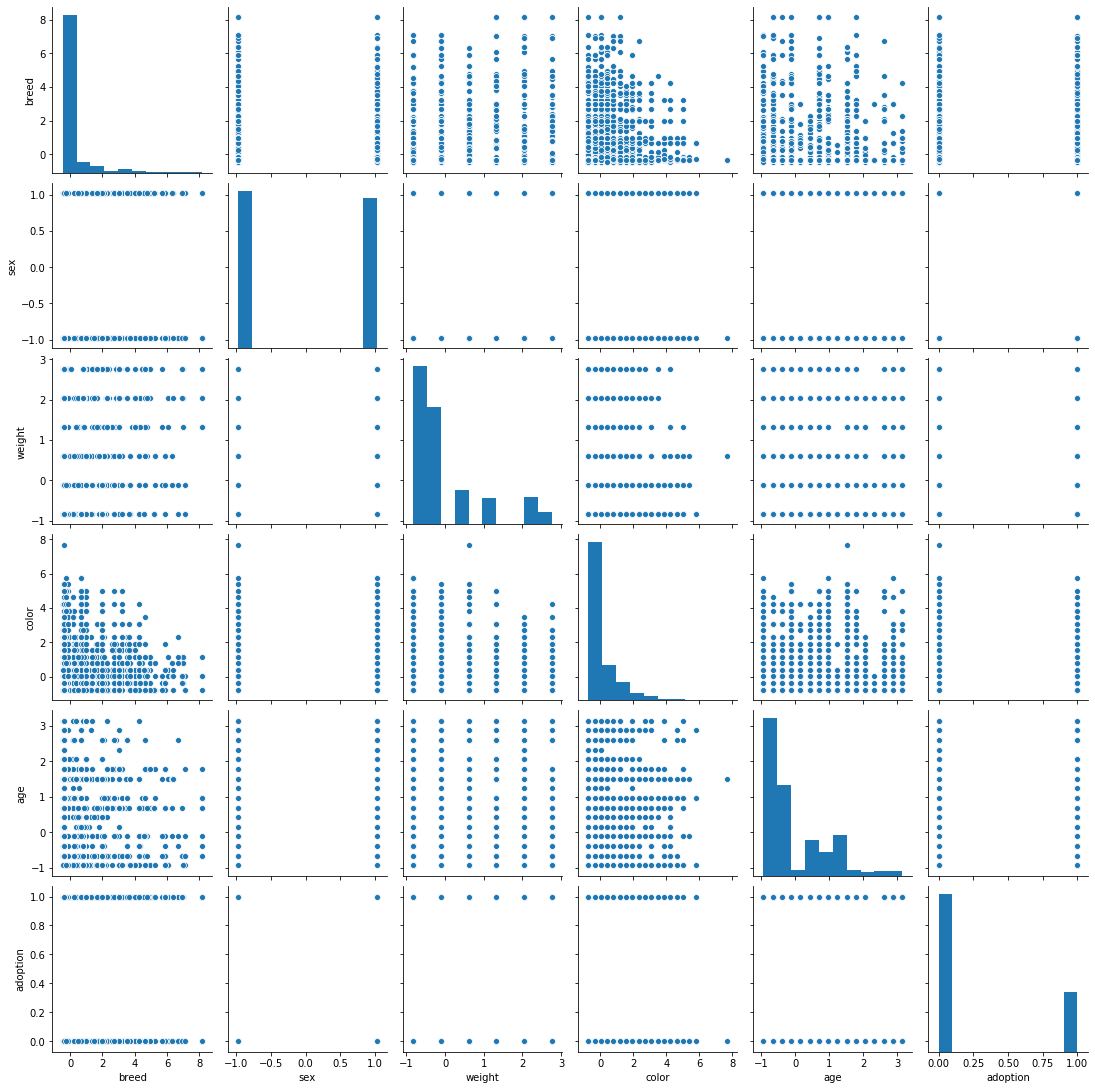

(1766, 2)


ValueError: y_true and y_pred have different number of output (2!=1)

In [9]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
import seaborn as sns

column_names = ['breed','sex','weight','color','age','adoption']
dataset = pd.read_csv('(0814)dog_info_final(7).csv',names=column_names)

#scaler 적용
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler()
scaler4 = MaxAbsScaler()

dataset[['breed','sex','weight','color','age']] = scaler1.fit_transform(dataset[['breed','sex','weight','color','age']])


sns.pairplot(dataset) # sns.pairplot(dataset,  hue='adoption') 
plt.show()

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

    ##y값의 활성화 함수 적용
data = dataset.values
X=data[:,0:5].astype(float)
Y_obj = data[:,5]

#머신러닝 시도

## Y차원 늘린후 0 or 1로 만들기 : one-hot-encoding
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)

#학습셋과 테스트셋의 구분
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X,Y_encoded,test_size=0.2,random_state=seed)
print(Y_valtest.shape)


# Fitting SVR to the dataset
from sklearn.svm import SVR
polysvr = SVR(kernel="poly", degree=2, gamma=1, coef0=0).fit(X, Y_obj)
rbfsvr = SVR(kernel="rbf").fit(X, Y_obj)
sigmoidsvr = SVR(kernel="sigmoid", gamma=2, coef0=2).fit(X, Y_obj)

Y_valtest_pred = rbfsvr.predict(X_valtest)
mse = mean_squared_error(Y_valtest,Y_valtest_pred)
evs = explained_variance_score(Y_valtest,Y_valtest_pred)
r2 = rbfsvr.score(X_valtest,Y_valtest)
print("\n###Performance ####")
print("Mean squared error =",round(mse,2))
print("Explained variance score =",round(evs,2))
print("r2squre =",round(r2,2))

# 회귀모델

In [1]:

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dense, Activation, Dropout
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
column_names = ['breed','sex','weight','color','age','adoption']
dataset = pd.read_csv('(0814)dog_info_final(7).csv',names=column_names)

#scaler 적용
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler()
scaler4 = MaxAbsScaler()

dataset[['breed','sex','weight','color','age']] = scaler1.fit_transform(dataset[['breed','sex','weight','color','age']])
#sns.pairplot(dataset, hue='adoption')
#plt.show()

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

    ##y값의 활성화 함수 적용
data = dataset.values
X=data[:,0:5].astype(float)
Y_obj = data[:,5]

#머신러닝 시도

## Y차원 늘린후 0 or 1로 만들기 : one-hot-encoding
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)

#학습셋과 테스트셋의 구분
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X,Y_encoded,test_size=0.2,random_state=seed)
print(Y_valtest.shape)


# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))


(1766, 2)


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
  

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
  

Baseline: nan (nan) MSE


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: in user code:

    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
  